### 工具准备

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from matplotlib.pylab import style #自定义图表风格
style.use('ggplot')

# 解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['Simhei']
# 解决坐标轴刻度负号乱码
plt.rcParams['axes.unicode_minus'] = False

#pip install statsmodels
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf  #自相关图、偏自相关图
from statsmodels.tsa.stattools import adfuller as ADF #平稳性检验
from statsmodels.stats.diagnostic import acorr_ljungbox #白噪声检验
import statsmodels.api as sm #D-W检验,一阶自相关检验
from statsmodels.graphics.api import qqplot #画QQ图,检验一组数据是否服从正态分布
from statsmodels.tsa.arima_model import ARIMA

#### 导入数据

In [2]:
#读取市场数据
mydata = pd.read_csv('样例\市场数据_加盐.csv',encoding='utf-8')

In [3]:
gangaotai = mydata[mydata['market_id']=='港澳台']

In [4]:
gangaotai['index_id']=gangaotai['year_id']+round(gangaotai['month_id']/12,2)

ipykernel_launcher:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [5]:
gangaotai

,Unnamed: 0,year_id,month_id,market_id,旅客量,客座率,index_id
0,0,2016,5,港澳台,1136974,0.735338,2016.42
4,4,2017,5,港澳台,1024773,0.749230,2017.42
9,9,2015,1,港澳台,924880,0.690316,2015.08
11,11,2017,6,港澳台,1038588,0.773162,2017.50
13,13,2016,7,港澳台,1029521,0.786995,2016.58
15,15,2017,9,港澳台,1078651,0.762506,2017.75
18,18,2015,7,港澳台,1057689,0.756394,2015.58
21,21,2016,3,港澳台,1074197,0.734295,2016.25
23,23,2017,11,港澳台,1083995,0.805752,2017.92
25,25,2017,3,港澳台,1020603,0.725456,2017.25


In [6]:
new_data=gangaotai.groupby('index_id')['旅客量'].mean()

In [7]:
gangaotai.sort_values(by=['index_id'])

,Unnamed: 0,year_id,month_id,market_id,旅客量,客座率,index_id
9,9,2015,1,港澳台,924880,0.690316,2015.08
51,51,2015,2,港澳台,1132415,0.809111,2015.17
79,79,2015,3,港澳台,998182,0.689143,2015.25
97,97,2015,4,港澳台,1083168,0.730944,2015.33
86,86,2015,5,港澳台,1146868,0.726202,2015.42
38,38,2015,6,港澳台,1099721,0.734731,2015.50
18,18,2015,7,港澳台,1057689,0.756394,2015.58
85,85,2015,8,港澳台,1231618,0.812901,2015.67
26,26,2015,9,港澳台,976569,0.726633,2015.75
77,77,2015,10,港澳台,1081384,0.747954,2015.83


<Figure size 936x432 with 0 Axes>

(array([2014.5, 2015. , 2015.5, 2016. , 2016.5, 2017. , 2017.5, 2018. ,
        2018.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(array([ 900000.,  950000., 1000000., 1050000., 1100000., 1150000.,
        1200000., 1250000., 1300000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 0, '时间')

Text(0, 0.5, '旅客量')

Text(0.5, 1.0, '港澳台旅客量指数变化图')

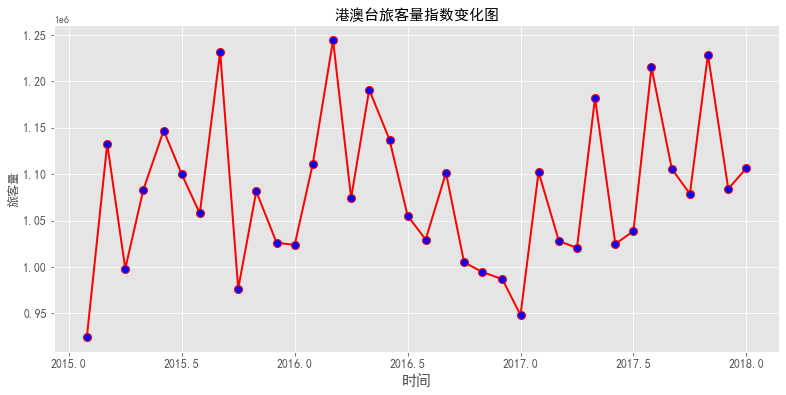

In [8]:
plt.figure(figsize = (13, 6))
# 设置x轴和y轴的值
x = new_data.index
y = new_data.values
# 绘制折线图
plt.plot(x, y, linewidth = 2, color = 'r', marker = 'o',
         markerfacecolor = 'blue', markersize = 8)
plt.xticks(size = 12)
plt.yticks(size = 12)
# 添加x轴和y轴的标签
plt.xlabel('时间', fontdict = {'size': 15})
plt.ylabel('旅客量', fontdict = {'size': 12})
plt.title('港澳台旅客量指数变化图', fontsize = 15)
# 保存图形
plt.savefig('样例\港澳台.jpg')

<Figure size 720x360 with 0 Axes>

<AxesSubplot:xlabel='index_id'>

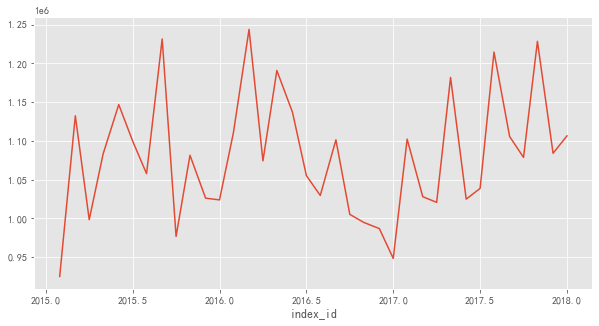

In [9]:
plt.figure(figsize=(10,5))
new_data.plot()
plt.show()

ipykernel_launcher:1: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


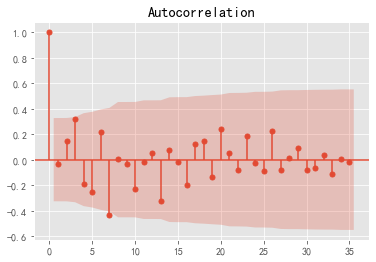

In [10]:
plot_acf(new_data,lags=35).show()

<Figure size 720x360 with 0 Axes>

<AxesSubplot:xlabel='index_id'>

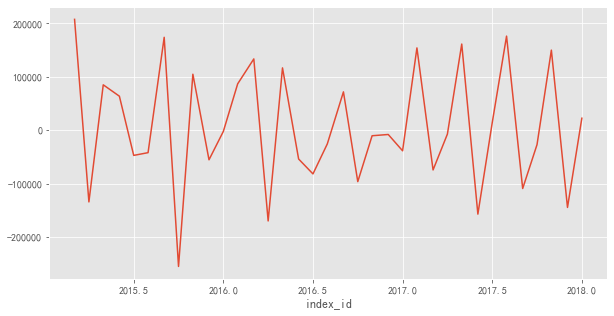

In [12]:
d1_data=new_data.diff(periods=1).dropna()
plt.figure(figsize=(10,5))
d1_data.plot()
plt.show()

ipykernel_launcher:1: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


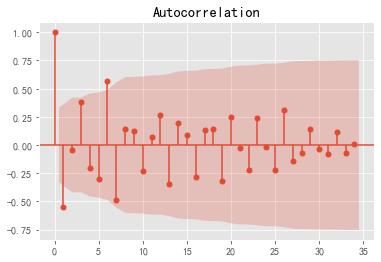

In [13]:
plot_acf(d1_data,lags=34).show()

In [15]:
print('原始序列的ADF检验结果为：',ADF(d1_data.values))

原始序列的ADF检验结果为： (-3.881363173669001, 0.0021763664012381394, 4, 30, {'1%': -3.6699197407407405, '5%': -2.9640707407407407, '10%': -2.621171111111111}, 608.0086956931259)


In [20]:
model=ARIMA(new_data,(0,1,1)).fit()
#查看模型报告
model.summary2()

C:\Program Files\Python37\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Program Files\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. 

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: ARIMA
===================================================================
Model:              ARIMA            BIC:                 904.0230 
Dependent Variable: D.旅客量            Log-Likelihood:      -446.68  
Date:               2021-05-18 00:32 Scale:               1.0000   
No. Observations:   35               Method:              css-mle  
Df Model:           2                Sample:              1        
Df Residuals:       33                                    6        
Converged:          1.0000           S.D. of innovations: 80218.184
No. Iterations:     36.0000          HQIC:                900.968  
AIC:                899.3570                                       
-------------------------------------------------------------------
              Coef.    Std.Err.    t    P>|t|    [0.025     0.975] 
-------------------------------------------------------------------
const        899.3755 1286.5583  0.6991 0.4845 -1622.2324 3420.9833
ma.L1.D.旅客量   -0.9992    0.1133 -8.8215 0.0000    -1.2212   -0.7772
----------------------------------------------------------------------------
                Real           Imaginary          Modulus          Frequency
----------------------------------------------------------------------------
MA.1           1.0008             0.0000           1.0008             0.0000
===================================================================

"""

In [21]:
model.forecast(7) #预测、标准差、置信区间

(array([1096158.86395943, 1097058.23941498, 1097957.61487053,
        1098856.99032608, 1099756.36578163, 1100655.74123718,
        1101555.11669273]),
 array([80218.1841669 , 80218.20936075, 80218.23455459, 80218.25974842,
        80218.28494225, 80218.31013606, 80218.33532987]),
 array([[ 938934.11208709, 1253383.61583176],
        [ 939833.43816361, 1254283.04066634],
        [ 940732.76424014, 1255182.46550091],
        [ 941632.09031669, 1256081.89033547],
        [ 942531.41639325, 1256981.31517   ],
        [ 943430.74246983, 1257880.74000453],
        [ 944330.06854642, 1258780.16483903]]))

In [22]:
#forecast=pd.Series(model.forecast(7)[0],index=pd.date_range('2015-2-7',periods=7,freq='D'))
forecast = pd.Series(model.forecast(7)[0],index=[2018.08,
2018.17,
2018.25,
2018.33,
2018.58,
2018.67,
2018.75])
forecast

2018.08    1.096159e+06
2018.17    1.097058e+06
2018.25    1.097958e+06
2018.33    1.098857e+06
2018.58    1.099756e+06
2018.67    1.100656e+06
2018.75    1.101555e+06
dtype: float64

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:>

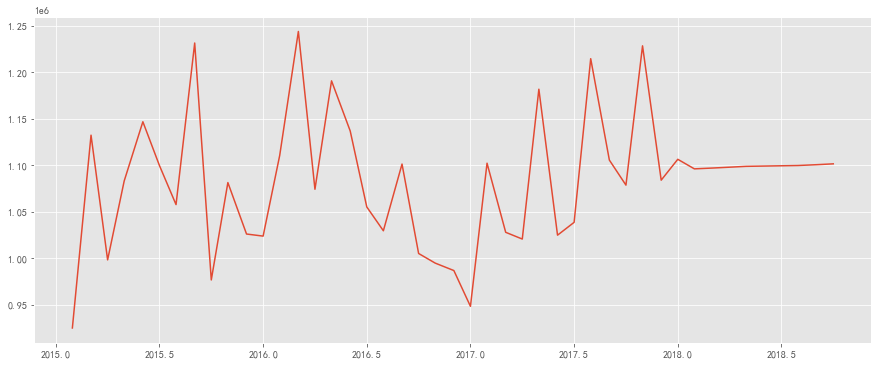

In [25]:
data=pd.concat((new_data,forecast),axis=0)
data.columns=['旅客量','未来7个月旅客量']
plt.figure(figsize=(15,6))
data.plot()
plt.show()